# Demo - Construyendo Detector de Personas con YOLOv3

En este notebook seguimos el tutorial de https://www.youtube.com/channel/UCrydcKaojc44XnuXrfhlV8Q "The AI Guy" para elaborar un pipeline para implementar YOLOv3. La arquitectura se modificó para que se ajuste a los requerimientos de nuestro detector, la cantidad de clases y el tamaño de data que tenemos. Como resultado final logramos obtener un demo de un detector personalizado YOLOv3.



## 1.Hay que asegurarse que el GPU está activado antes de iniciar la ejecución.




## 2.Clonar y construir Darknet
#### Clonar el repositorio de Github de la versión de AlexeyAB.

In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 13781, done.
remote: Total 13781 (delta 0), reused 0 (delta 0), pack-reused 13781
Receiving objects: 100% (13781/13781), 12.36 MiB | 11.56 MiB/s, done.
Resolving deltas: 100% (9407/9407), done.


In [3]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

[Errno 2] No such file or directory: 'darknet'
/content/darknet


In [4]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [5]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-W

## 3.Descargar los pesos pre-entrenados de YOLOv3.

In [ ]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-07-03 06:08:43--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights        4%[                    ]  10.63M   447KB/s    eta 8m 30s ^C


In [6]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:

# This stops 'Run all' at this cell by causing an error
assert False

## 4.Vincular Drive con Colab

In [7]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [8]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'Colab Notebooks'  'Proyecto Robótica'	  'Trabajo Final ITIS'	   yolov3
 darknet	    robA_2018_I_HanaList  'Trabajo Java Clinica'   yolov3ppl
 Otros		    Trabajo		   UESAN


In [9]:
# run darknet command with google drive image (my image path is /images/plane.jpg)
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights /mydrive/UESAN/Otros/image3.jpg
imShow('predictions.jpg')

/content/darknet
 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 610, cudnn_half = 0, GPU: Tesla P4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 

AttributeError: ignored

In [ ]:
# LOCAL MACHINE DOWNLOAD
# if you get an error first run then run it again and it should work
download('predictions.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# GOOGLE DRIVE DOWNLOAD
# note that I can change what the image name is saved as (I am saving it as detection1.jpg)
!cp predictions.jpg /mydrive/UESAN/Otros/detection1.jpg

## 5.Preparando el ambiente para el Detector YOLOv3 Personalizado  

Para esto necesitariamos lo siguiente:
*   Anotaciones del Dataset
*   Archivo  custom .cfg, YOLOv3 editado para los requerimientos del caso. 
*   Archivos obj.data & obj.names 
*   Archivos train.txt y test.txt


In [11]:
#%cd ..
#!ls
#%cd content

/content


In [12]:
!ls

darknet  gdrive  sample_data


In [13]:
%cd darknet

/content/darknet


In [14]:
# En esta carpeta estará la data que necesitaremos
!ls /mydrive/yolov3ppl

backup			obj.data	 social-distance-detector.zip
chart01.png		obj.names	 test.txt
gamarra.mp4		obj.zip		 train.txt
generate_train-test.py	out2.avi	 video01.mp4
imagen1.jpg		out.avi		 yolov3_custom-c1.cfg
imagen2.jpg		pedestrians.mp4


In [15]:
# Copiamos el zip obj al directorio raíz donde está la carpeta Darknet donde se encuentran nuestras anotacionaes en formato yolo e imagenes.
!cp /mydrive/yolov3ppl/obj.zip ../

In [16]:
# Descomprimimos el archivo obj en la carpeta data dentro de Darknet, en /darknet/data/obj
!unzip ../obj.zip -d data/

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: data/obj/COCO_val2014_000000513507.txt  
  inflating: data/obj/COCO_val2014_000000513524.jpg  
  inflating: data/obj/COCO_val2014_000000513524.txt  
  inflating: data/obj/COCO_val2014_000000513555.jpg  
  inflating: data/obj/COCO_val2014_000000513555.txt  
  inflating: data/obj/COCO_val2014_000000513567.jpg  
  inflating: data/obj/COCO_val2014_000000513567.txt  
  inflating: data/obj/COCO_val2014_000000513574.jpg  
  inflating: data/obj/COCO_val2014_000000513574.txt  
  inflating: data/obj/COCO_val2014_000000513580.jpg  
  inflating: data/obj/COCO_val2014_000000513580.txt  
  inflating: data/obj/COCO_val2014_000000513600.jpg  
  inflating: data/obj/COCO_val2014_000000513600.txt  
  inflating: data/obj/COCO_val2014_000000513604.jpg  
  inflating: data/obj/COCO_val2014_000000513604.txt  
  inflating: data/obj/COCO_val2014_000000513615.jpg  
  inflating: data/obj/COCO_val2014_000000513615.txt  
  inflating: data/obj

### 5.1.-Configurando los Archivos del punto 5

Acá vamos a configurar el archivo personalizado .cfg, que contiene la configuración de la arquitectura del modelo que vamos a usar, el obj.datam obj.names y los archivos de train.txt y test.txt.
This step involves properly configuring your custom .cfg file, obj.data, obj.names and train.txt file.


In [ ]:
# Esto se realiza una sola vez, después ya tendremos el modelo para configurar en nuestro drive
#download cfg to google drive and change its name
#!cp cfg/yolov3.cfg /mydrive/yolov3ppl/yolov3_custom2.cfg

In [ ]:
# to download to local machine (change its name to yolov3_custom.cfg once you download)
#download('cfg/yolov3.cfg')

Dentro del .cfg se cambió el batch = 64, las subdivisiones a 16 para mejores resultados. Asimismo, como se describe en el paper de Yolo max_batches es igual a 2000 * num_clases, en nuestro caso son 5 así que será 10000, con steps=8000,9000, cambiamos el número de clases a 5 en las tres capas YOLO y se ajustó el valor de los filtros de las 3 capas anteriores a las capas YOLO con la fórmula: Filtros = (C+5)*3 = 30.

In [27]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov3ppl/yolov3_custom-c1.cfg ./cfg

# upload the custom .cfg back to cloud VM from local machine (uncomment to use)
#%cd cfg
#upload()
#%cd .. 

### 5.2.-Cargamos los archivos obj.names y obj.data

In [18]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov3ppl/obj.names ./data
!cp /mydrive/yolov3ppl/obj.data  ./data

# upload the obj.names and obj.data files to cloud VM from local machine (uncomment to use)
#%cd data
#upload()
#%cd .. 

## 5.3.- Generamos los grupos de Train y Test

Para esto se generaran los archivos train.txt y test.txt que contienen las rutas de las imágenes, para esta división utilizamos la regla de Pareto de 80/20.

In [19]:
# Copiamos las muestras de train y test dentro de la VM en la nube: yolov3ppl
!cp /mydrive/yolov3ppl/test.txt ./data
!cp /mydrive/yolov3ppl/train.txt  ./data

In [ ]:
# Cargamos el archivo para generar el test y train desde el drive
#!cp /mydrive/yolov3ppl/generate_train.py ./

# upload the generate_train.py script to cloud VM from local machine (uncomment to use)
#upload()


In [ ]:
#!cp /mydrive/yolov3ppl/train_test.py ./

Now we simply run the python script to do all the work for us.

In [ ]:
# Generamos Train y Test, si no se tienen las muestras en el Drive
#!python generate_train.py

In [20]:
!ls

3rdparty   CMakeLists.txt	   image_yolov3.sh	  README.md
backup	   darknet		   include		  results
build	   DarknetConfig.cmake.in  json_mjpeg_streams.sh  scripts
build.ps1  darknet.py		   LICENSE		  src
build.sh   darknet_video.py	   Makefile		  video_v2.sh
cfg	   data			   net_cam_v3.sh	  video_yolov3.sh
cmake	   image_yolov2.sh	   obj


In [21]:
# Verificamos que train.txt y test.txt estén en darknet/data
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     test.txt
coco.names  goal.txt	 labels			   openimages.names  train.txt
dog.jpg     horses.jpg	 obj			   person.jpg	     voc.names


## 6.Descargamos los pesos pre-entrenados de las capas convolucionales, como estamos usando YOLOv3, se usará Darknet-53: Download pre-trained weights for the convolutional layers.

Se utilizan estos pesos porque ayudan al modelo a entrenar y covnerger más rápido, además de conseguir un mejor accuracy. 

In [22]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2020-07-06 00:11:44--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2020-07-06 00:11:45--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  2.20MB/s    in 70s     

2020-07-06 00:12:55 (2.22 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



## 7.Entrenar el modelo Detector de objetos personalizado - YOLOv3

Un tip que se extrajo del tutorial de "The IA guy" es utilizar el siguiente código para evitar que Google Colab te kickee por estar afk cierto tiempo.




Paste the following code into your console window and hit **Enter**
```
function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)
```
Este código hará click en la pantalla cada 10 minutos para que Colab no te expulse por estar inactivo. 



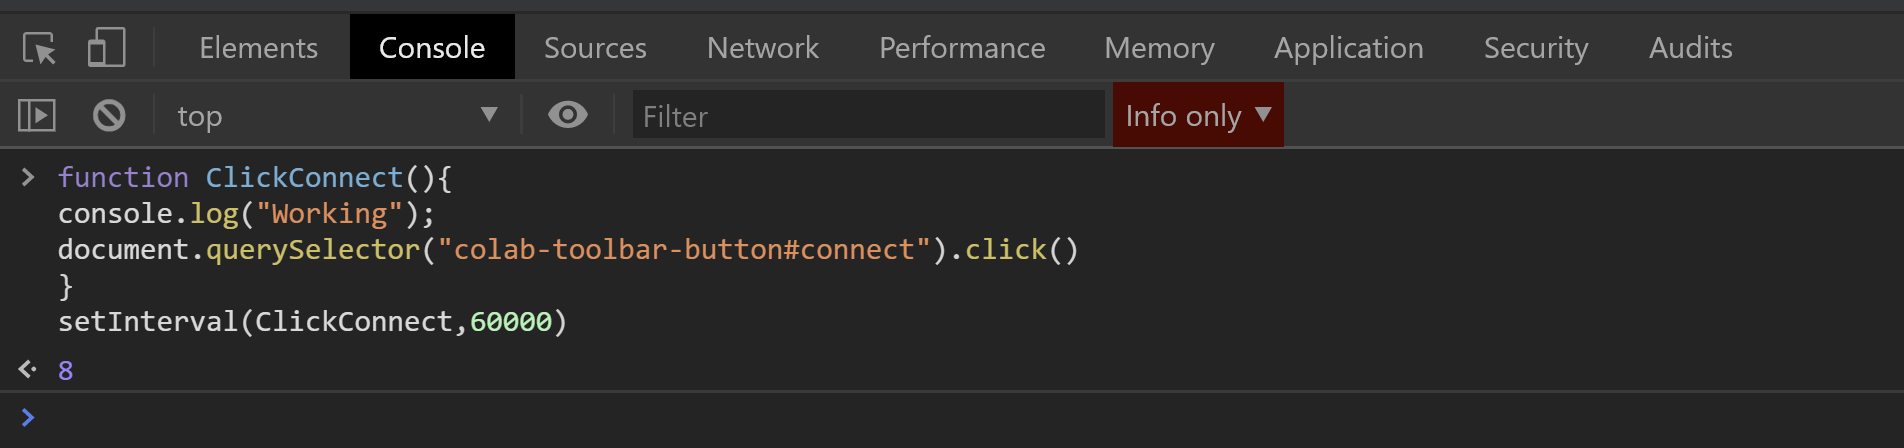

In [ ]:
# train your custom detector
!./darknet detector train data/obj.data cfg/yolov3_custom-c1.cfg darknet53.conv.74 -dont_show

Se han truncado las últimas 5000 líneas del flujo de salida.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000527, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.006063, iou_loss = 0.000000, total_loss = 0.006063 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.613018, GIOU: 0.587703), Class: 0.998361, Obj: 0.288440, No Obj: 0.001126, .5R: 0.625000, .75R: 0.250000, count: 8, class_loss = 1.334457, iou_loss = 1.212772, total_loss = 2.547229 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.571722, GIOU: 0.550756), Class: 0.981524, Obj: 0.022919, No Obj: 0.000220, .5R: 0.571429, .75R: 0.142857, count: 7, class_loss = 1.753039, iou_loss = 1.373458, total_loss = 3.126497 
 total_bbox = 369974, rewritten_bbox = 0.770324 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.722631, GIOU: 0.722438), Class: 0.999808, Obj: 0.83442

You can observe a chart of how your model did throughout the training process by running the below command. It shows a chart of your average loss vs. iterations. For your model to be 'accurate' you would aim for a loss under 2.

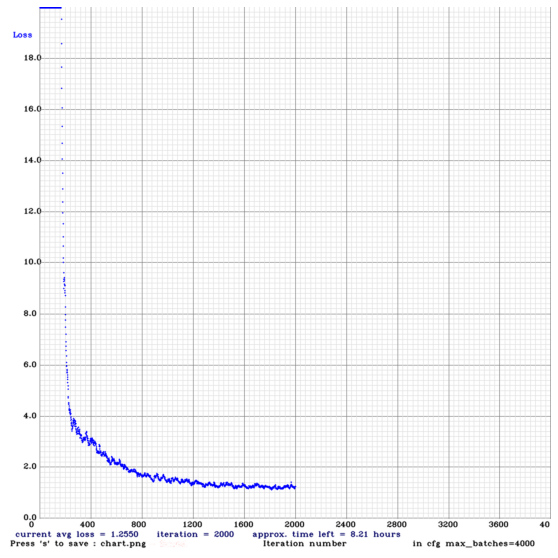

In [ ]:
imShow('chart.png')

In [ ]:
# Guardamos el Gráfico en el Drive
!cp ./chart.png /mydrive/yolov3ppl/

Otro truco que se extrajo fue que si por alguna razón Colab falla, no se pierden los pesos que se han entrenado ya que cada 100 iteraciones un archivo de los pesos llamado yolov3_custom_last.weights es guardado en la carpeta que especificamos en el drive: mydrive/yolov3/backup/. De esta manera, si Colab crashea o sucede otro fallo se tiene un avance almacenado. 

Para continuar con el entrenamiento desde el último peso guardado se puede usar el siguiente código y de esa manera no se tendrá que reiniciar el entrenamiento.

In [28]:
!./darknet detector train data/obj.data cfg/yolov3_custom-c1.cfg /mydrive/yolov3ppl/backup/yolov3_custom-c1_last.weights -dont_show

Se han truncado las últimas 5000 líneas del flujo de salida.
 total_bbox = 78527, rewritten_bbox = 0.839202 % 

 3926: 0.720476, 0.992862 avg loss, 0.000010 rate, 11.584987 seconds, 251264 images, 0.355540 hours left
Loaded: 0.000035 seconds
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.778563, GIOU: 0.775876), Class: 0.998417, Obj: 0.443594, No Obj: 0.002030, .5R: 1.000000, .75R: 0.500000, count: 4, class_loss = 0.722785, iou_loss = 0.148230, total_loss = 0.871014 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.891563, GIOU: 0.890952), Class: 0.996653, Obj: 0.118662, No Obj: 0.000158, .5R: 1.000000, .75R: 1.000000, count: 1, class_loss = 0.488896, iou_loss = 0.020115, total_loss = 0.509010 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000005, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000290, iou_loss = 0.000000, total_loss = 0.000

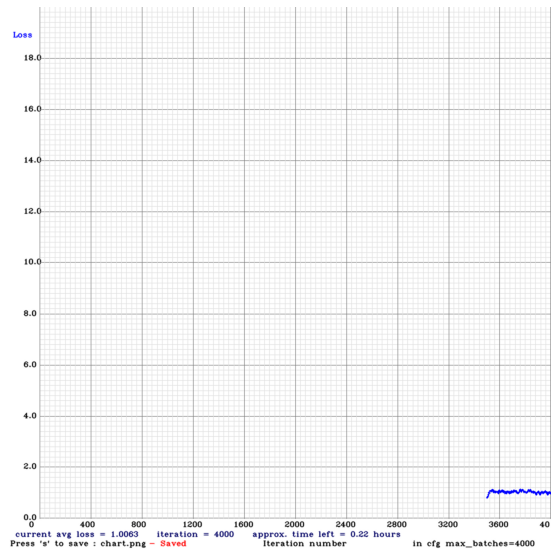

In [30]:
imShow('chart.png')

In [32]:
# Guardamos el Gráfico en el Drive
!cp ./chart.png /mydrive/yolov3ppl/

## 8.Test: Ejecutamos pruebas en el Detector

Vamos a probar con unos predicts y por último calcularemos el mAP.


In [31]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom-c1.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom-c1.cfg
%cd ..


/content/darknet/cfg
/content/darknet


### 8.1.-Pruebas con Imágenes independientes:

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 610, cudnn_half = 0, GPU: Tesla P4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

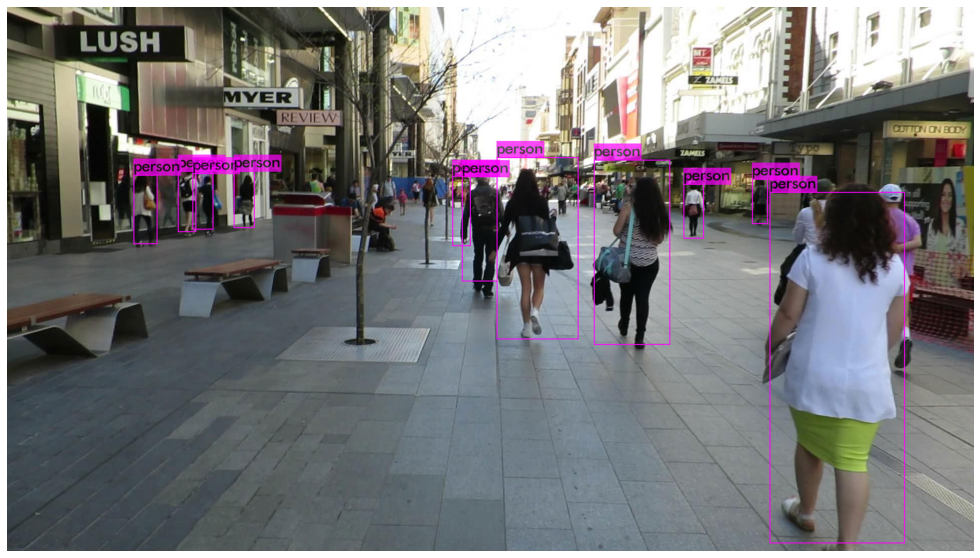

In [24]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom-c1.cfg /mydrive/yolov3ppl/backup/yolov3_custom-c1_last.weights /mydrive/yolov3ppl/imagen1.jpg -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 610, cudnn_half = 0, GPU: Tesla P4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

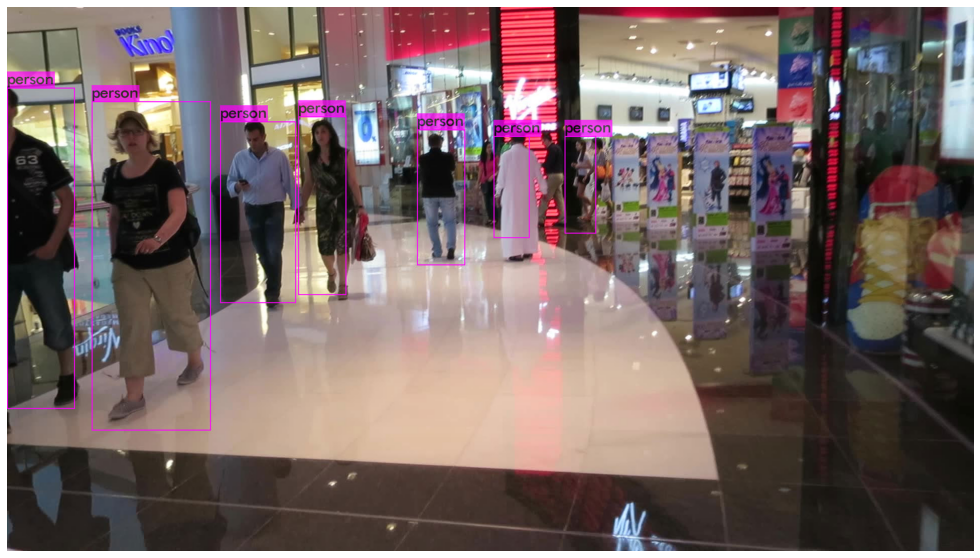

In [33]:
!./darknet detector test data/obj.data cfg/yolov3_custom-c1.cfg /mydrive/yolov3ppl/backup/yolov3_custom-c1_last.weights /mydrive/yolov3ppl/imagen2.jpg -thresh 0.3
imShow('predictions.jpg')

### 8.2.-Calculamos el mAP en la muestra de Test

In [34]:
!./darknet detector map data/obj.data cfg/yolov3_custom-c1.cfg /mydrive/yolov3ppl/backup/yolov3_custom-c1_last.weights -thresh 0.3 -points 0

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 610, cudnn_half = 0, GPU: Tesla P4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

### 8.3.-Demo del Modelo en los videos de Peatones y Oxford.

In [ ]:
!ls

darknet  data  gdrive  obj.zip	sample_data  yolov3.weights


In [36]:
#%cd darknet/
!ls

3rdparty		    darknet53.conv.74	    net_cam_v3.sh
backup			    DarknetConfig.cmake.in  obj
build			    darknet.py		    predictions.jpg
build.ps1		    darknet_video.py	    README.md
build.sh		    data		    results
cfg			    image_yolov2.sh	    scripts
chart.png		    image_yolov3.sh	    src
chart_yolov3_custom-c1.png  include		    video_v2.sh
cmake			    json_mjpeg_streams.sh   video_yolov3.sh
CMakeLists.txt		    LICENSE
darknet			    Makefile


In [39]:
!cp /mydrive/yolov3ppl/gamarra.mp4 ./data

In [41]:
!./darknet detector demo data/obj.data cfg/yolov3_custom-c1.cfg /mydrive/yolov3ppl/backup/yolov3_custom-c1_last.weights -dont_show data/gamarra.mp4 -i 0 -out_filename out4.avi

Se han truncado las últimas 5000 líneas del flujo de salida.
person: 34% 
person: 31% 

FPS:26.8 	 AVG_FPS:28.3

 cvWriteFrame 
Objects:

person: 81% 
person: 71% 
person: 68% 
person: 50% 
person: 38% 
person: 32% 
person: 28% 

FPS:26.6 	 AVG_FPS:28.3

 cvWriteFrame 
Objects:

person: 69% 
person: 64% 
person: 50% 
person: 48% 
person: 36% 
person: 34% 
person: 31% 

FPS:26.4 	 AVG_FPS:28.3

 cvWriteFrame 
Objects:

person: 72% 
person: 62% 
person: 51% 
person: 37% 
person: 31% 
person: 30% 
person: 28% 
person: 27% 

FPS:26.9 	 AVG_FPS:28.3

 cvWriteFrame 
Objects:

person: 52% 
person: 47% 
person: 44% 
person: 39% 
person: 34% 
person: 29% 
person: 26% 

FPS:27.6 	 AVG_FPS:28.3

 cvWriteFrame 
Objects:

person: 50% 
person: 46% 
person: 46% 
person: 43% 
person: 37% 

FPS:28.0 	 AVG_FPS:28.3

 cvWriteFrame 
Objects:

person: 65% 
person: 52% 
person: 44% 
person: 40% 
person: 35% 
person: 33% 
person: 25% 

FPS:27.6 	 AVG_FPS:28.3

 cvWriteFrame 
Objects:

person: 73% 
person: 63

In [42]:
!cp ./out4.avi /mydrive/yolov3ppl/

In [43]:
#Probamos con el video de Oxford
!cp /mydrive/yolov3ppl/pedestrians.mp4 ./data

In [44]:
!./darknet detector demo data/obj.data cfg/yolov3_custom-c1.cfg /mydrive/yolov3ppl/backup/yolov3_custom-c1_last.weights -dont_show data/pedestrians.mp4 -i 0 -out_filename out5.avi

Se han truncado las últimas 5000 líneas del flujo de salida.

 cvWriteFrame 
Objects:

person: 94% 
person: 76% 
person: 73% 
person: 67% 
person: 64% 
person: 52% 
person: 47% 
person: 47% 
person: 47% 
person: 40% 
person: 39% 
person: 31% 
person: 28% 
person: 28% 

FPS:25.5 	 AVG_FPS:23.2

 cvWriteFrame 
Objects:

person: 92% 
person: 83% 
person: 80% 
person: 77% 
person: 58% 
person: 55% 
person: 42% 
person: 42% 
person: 40% 
person: 39% 
person: 37% 
person: 34% 
person: 27% 

FPS:25.9 	 AVG_FPS:23.2

 cvWriteFrame 
Objects:

person: 90% 
person: 83% 
person: 81% 
person: 73% 
person: 64% 
person: 46% 
person: 44% 
person: 39% 
person: 39% 
person: 30% 
person: 27% 
person: 26% 
person: 25% 

FPS:25.8 	 AVG_FPS:23.2

 cvWriteFrame 
Objects:

person: 79% 
person: 77% 
person: 74% 
person: 71% 
person: 60% 
person: 54% 
person: 46% 
person: 44% 
person: 42% 
person: 39% 
person: 37% 
person: 34% 
person: 28% 
person: 26% 
person: 25% 

FPS:26.3 	 AVG_FPS:23.2

 cvWriteFrame 
Obje

In [45]:
!cp ./out5.avi /mydrive/yolov3ppl/

In [ ]:
# Probar con thresh de 0.25

# Gracias!